## Лабораторна робота 5. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя.

In [35]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0**

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(columns = {'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
data.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA Mall Customers

**Завдання 1**

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка;
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
data.shape

(200, 5)

In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [5]:
data.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

Набір даних пропущенних значень не має

**Завдання 2**

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [8]:
df = data.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3**

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

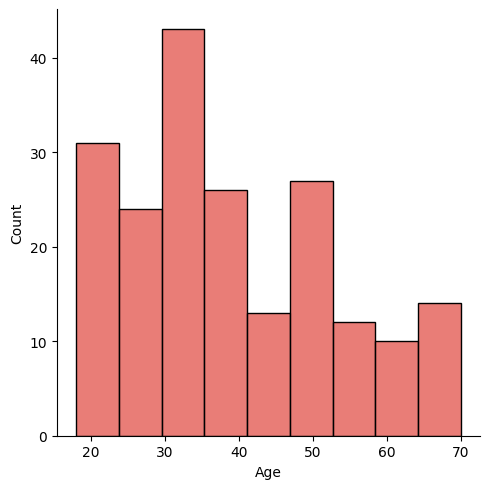

In [9]:
pal = sns.color_palette("Spectral")
sns.set_palette(pal)
sns.displot(df, x='Age')
plt.show()

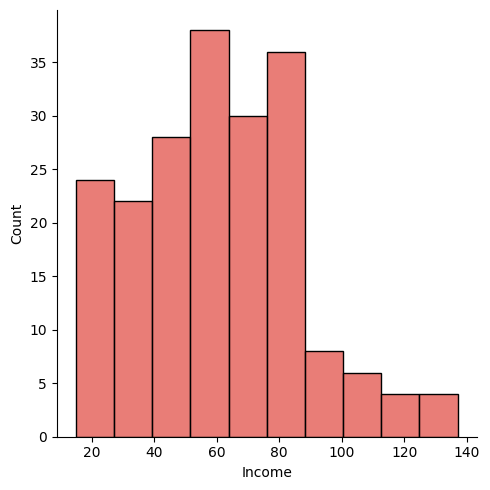

In [10]:
sns.displot(df, x='Income')
plt.show()

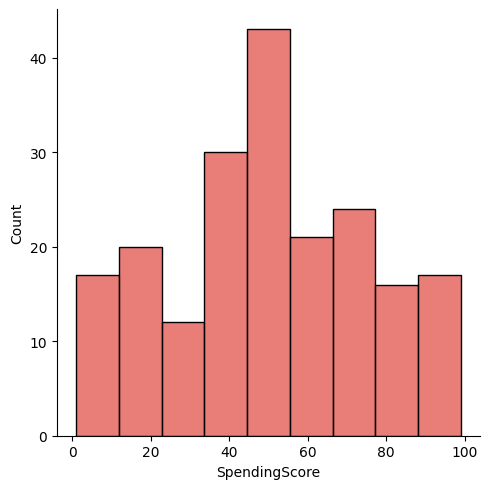

In [11]:
sns.displot(df, x='SpendingScore')
plt.show()

**Завдання 4**

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`.
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  

* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  


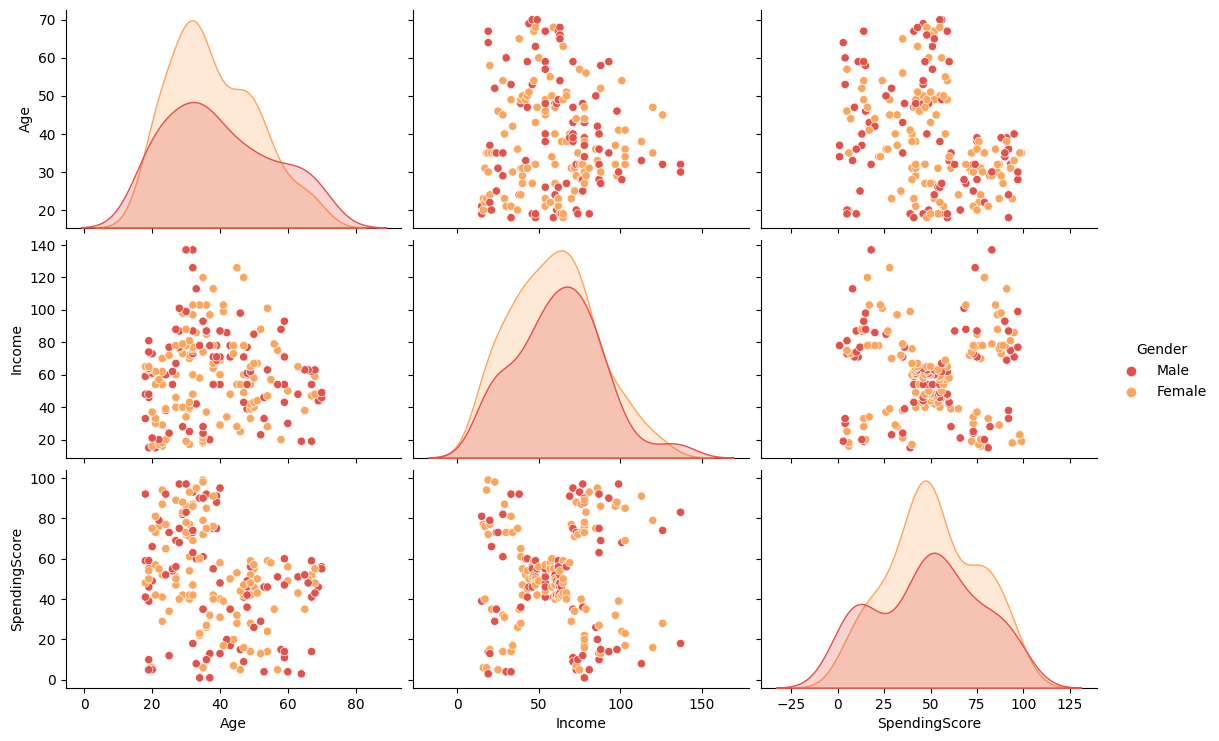

In [12]:
sns.pairplot(df, hue = 'Gender', aspect = 1.5)
plt.show()

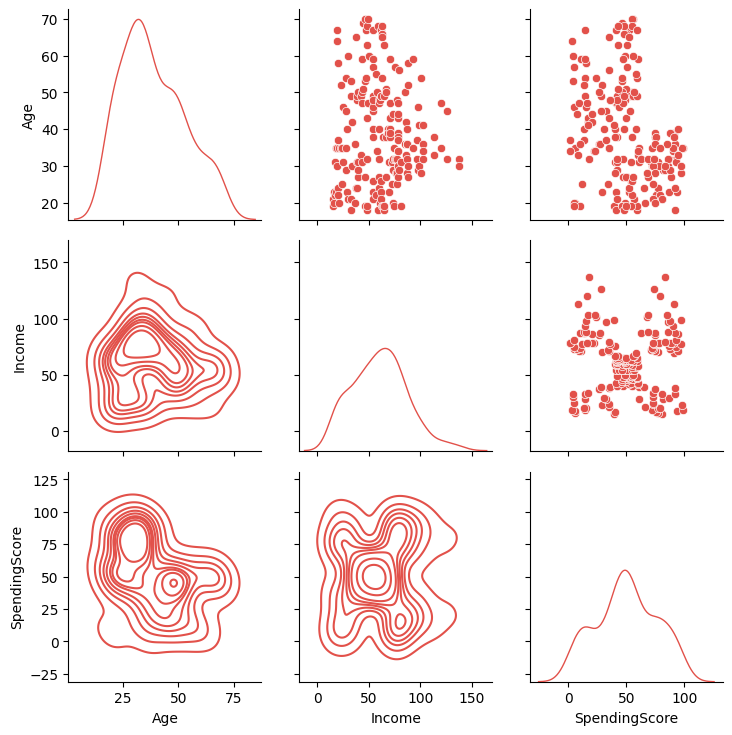

In [13]:
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 1)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. В датасеті немає пропущених значень   
2. Змінні Age , Income та SpendingScore не нормально розподілені
3. Немає тенденції, що можна якомь поділити дані на класи відповідно до Gender
4. Є певна тенденція поділу на класи між Income і SpendingScorе, це як гіпотезу можна використати в подальшій роботі

**Завдання 5**

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

In [14]:
data_pie = df.groupby('Gender').size()
data_pie

Gender
Female    112
Male       88
dtype: int64

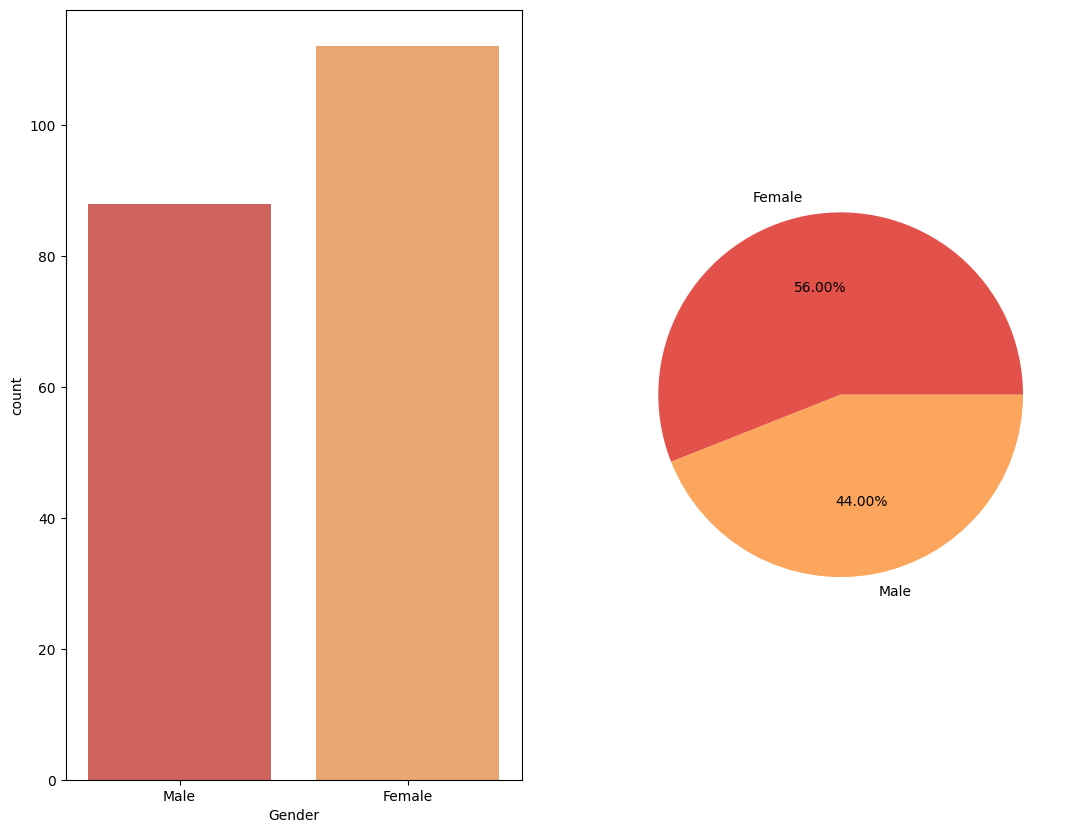

In [15]:
fig = plt.figure(figsize=(20,10))


ax1 = plt.subplot2grid((1,3),(0,0))
sns.countplot(x='Gender', data=df)


ax2 = plt.subplot2grid((1,3),(0,1))
plt.pie(data_pie, labels = ['Female', 'Male'], autopct='%.2f%%')

plt.show()

**Завдання 6**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

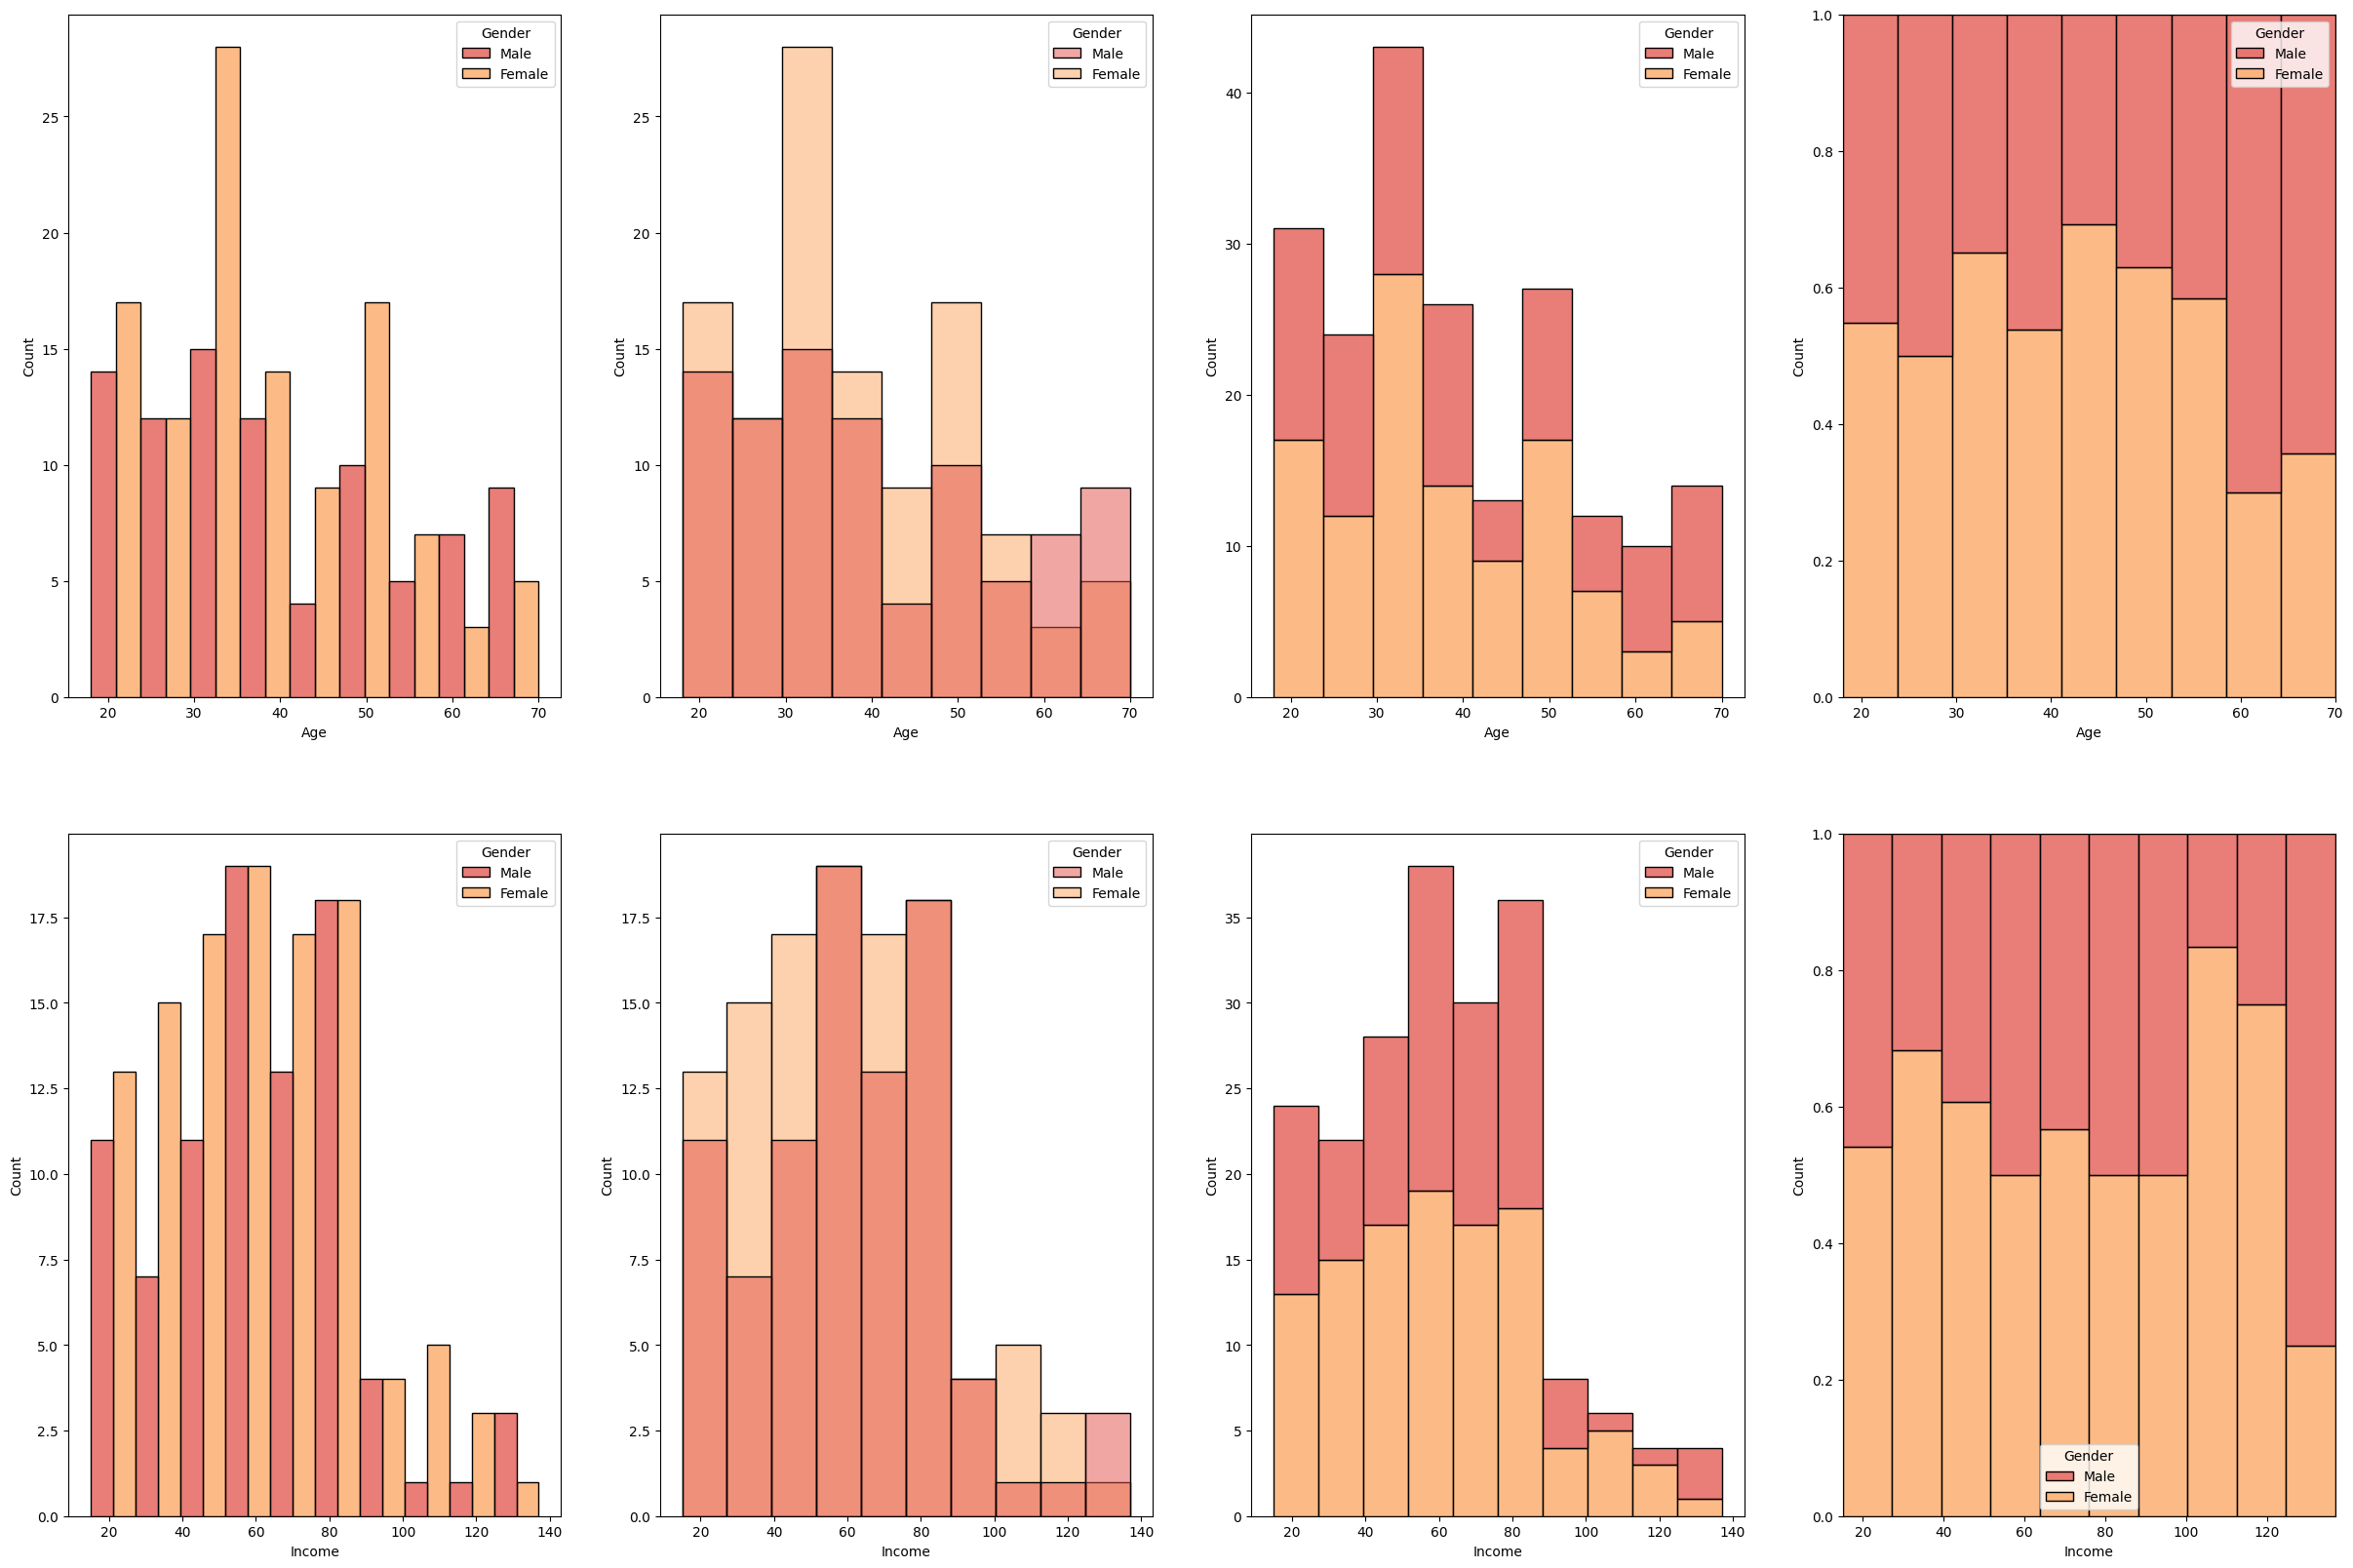

In [16]:
fig = plt.figure(figsize=(30,20))

ax1 = plt.subplot2grid((2,4),(0,0))
sns.histplot(data = df, x= 'Age', hue = 'Gender', multiple='dodge')
ax2 = plt.subplot2grid((2,4),(0,1))
sns.histplot(data = df, x= 'Age', hue = 'Gender', multiple='layer')
ax3 = plt.subplot2grid((2,4),(0,2))
sns.histplot(data = df, x= 'Age', hue = 'Gender', multiple='stack')
ax4 = plt.subplot2grid((2,4),(0,3))
sns.histplot(data = df, x= 'Age', hue = 'Gender', multiple='fill')

ax5 = plt.subplot2grid((2,4),(1,0))
sns.histplot(data = df, x= 'Income', hue = 'Gender', multiple='dodge')
ax6 = plt.subplot2grid((2,4),(1,1))
sns.histplot(data = df, x= 'Income', hue = 'Gender', multiple='layer')
ax7 = plt.subplot2grid((2,4),(1,2))
sns.histplot(data = df, x= 'Income', hue = 'Gender', multiple='stack')
ax8 = plt.subplot2grid((2,4),(1,3))
sns.histplot(data = df, x= 'Income', hue = 'Gender', multiple='fill')

plt.show()

**Завдання 7**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.



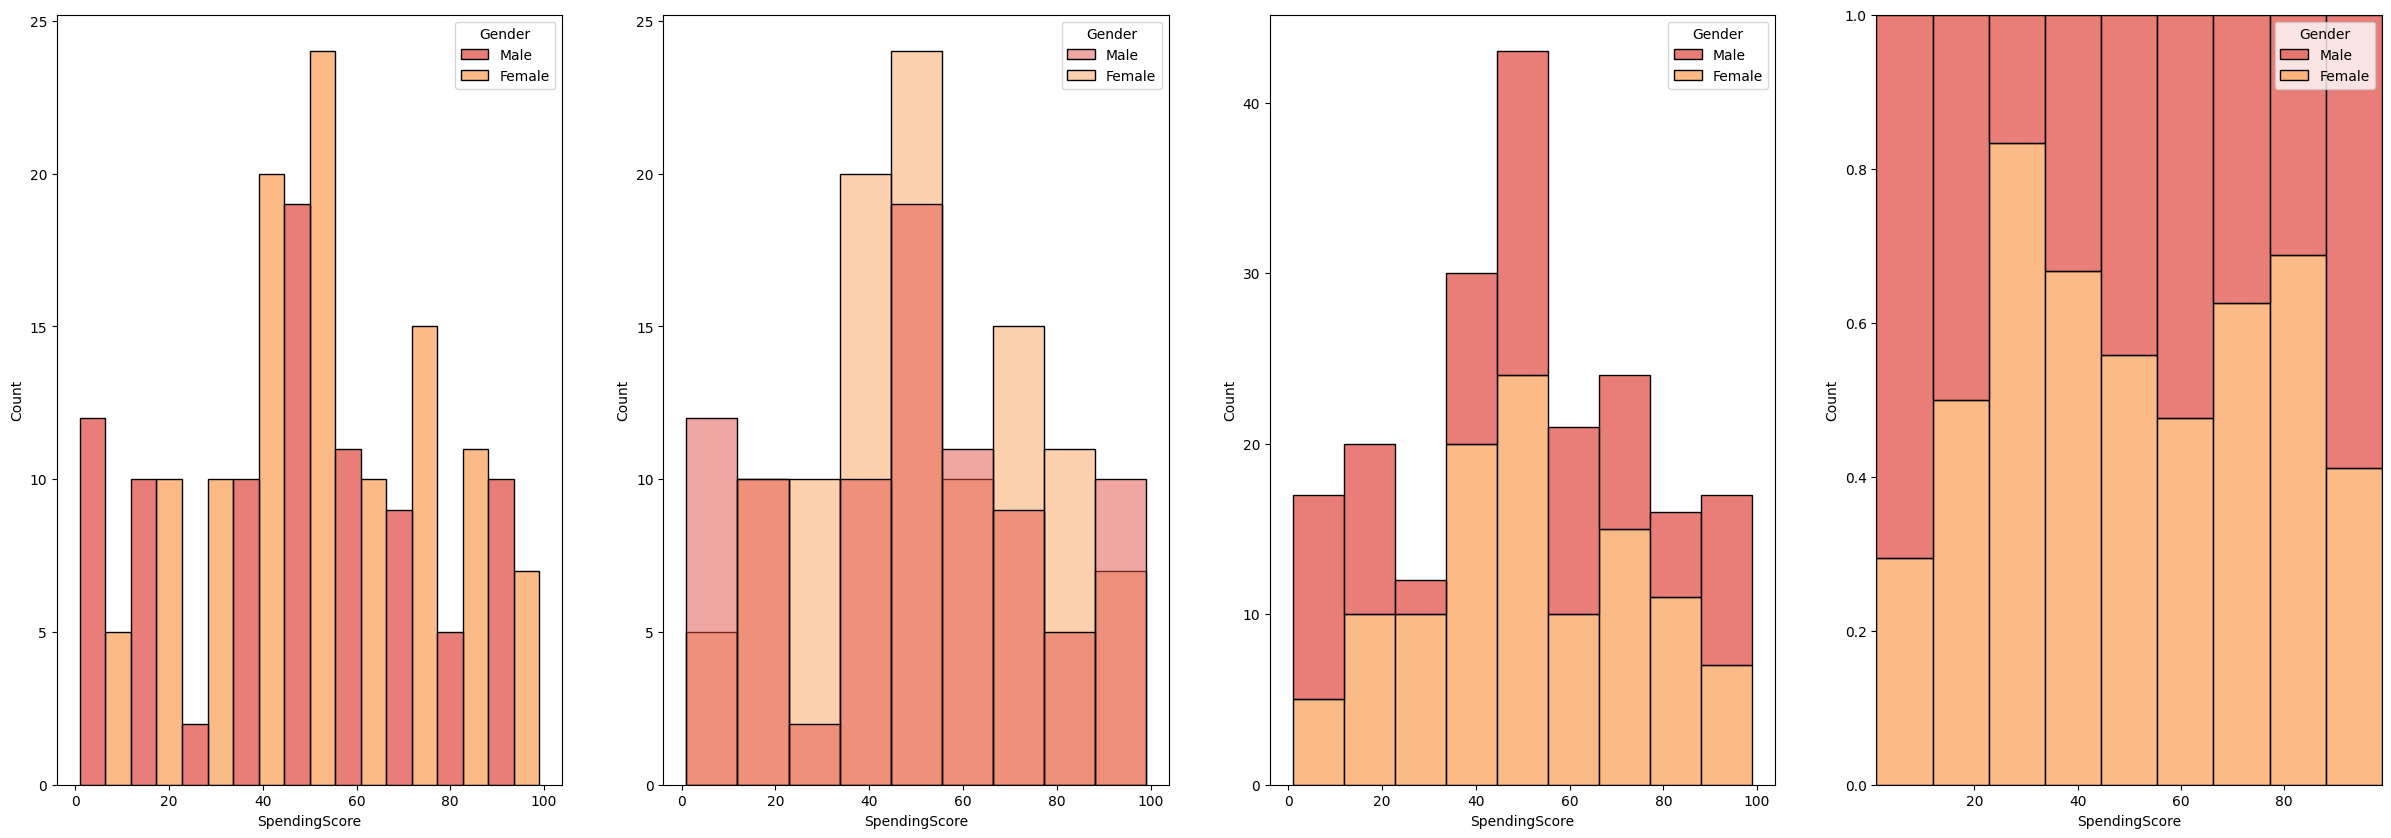

In [17]:
fig = plt.figure(figsize=(30,10))

ax1 = plt.subplot2grid((1,4),(0,0))
sns.histplot(data = df, x= 'SpendingScore', hue = 'Gender', multiple='dodge')
ax2 = plt.subplot2grid((1,4),(0,1))
sns.histplot(data = df, x= 'SpendingScore', hue = 'Gender', multiple='layer')
ax3 = plt.subplot2grid((1,4),(0,2))
sns.histplot(data = df, x= 'SpendingScore', hue = 'Gender', multiple='stack')
ax4 = plt.subplot2grid((1,4),(0,3))
sns.histplot(data = df, x= 'SpendingScore', hue = 'Gender', multiple='fill')
plt.show()

**Завдання 8**

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`.

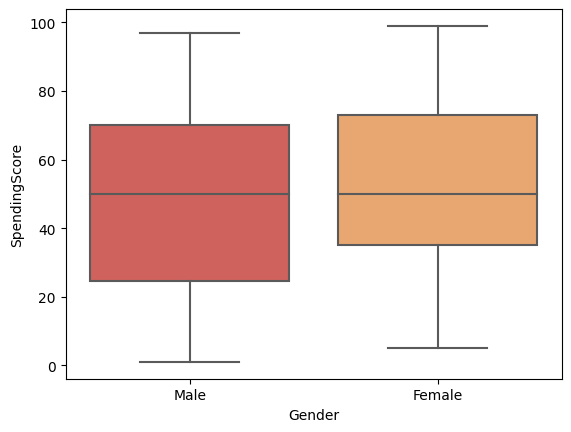

In [18]:
sns.boxplot(y = 'SpendingScore', x = 'Gender', data = df)
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1. Співвідношення чоловіків і жінок: 5/4. Кількість жінок більша
2. Жінки витрачали більше ніж чоловіки, середні витрати між чоловіками і жінками рівні

## K-means Method ##

**Завдання 9**

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

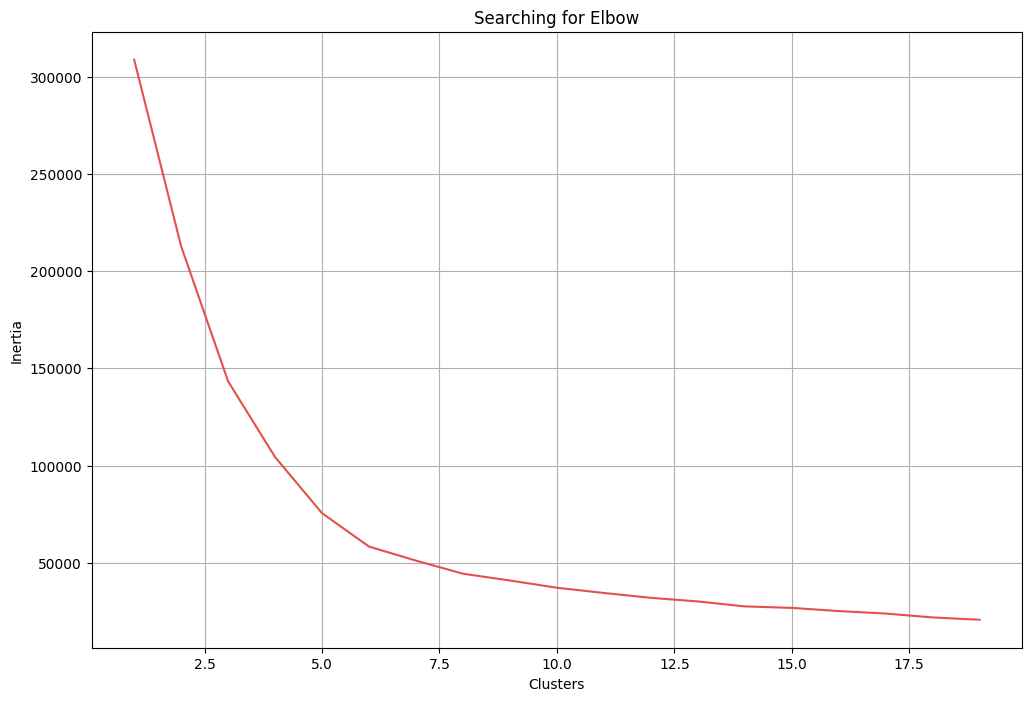

In [19]:
X = df.drop(['Gender'], axis=1)
clusters = []

for i in range(1,20):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)


fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.grid(True)
plt.show()

**Висновки з завдання 9 (детальні)**

З метода Елбоу можемо припустити,що кількість класів може бути 3 5 і 6

**Завдання 10**

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`.

#### K-Means for 3 clusters

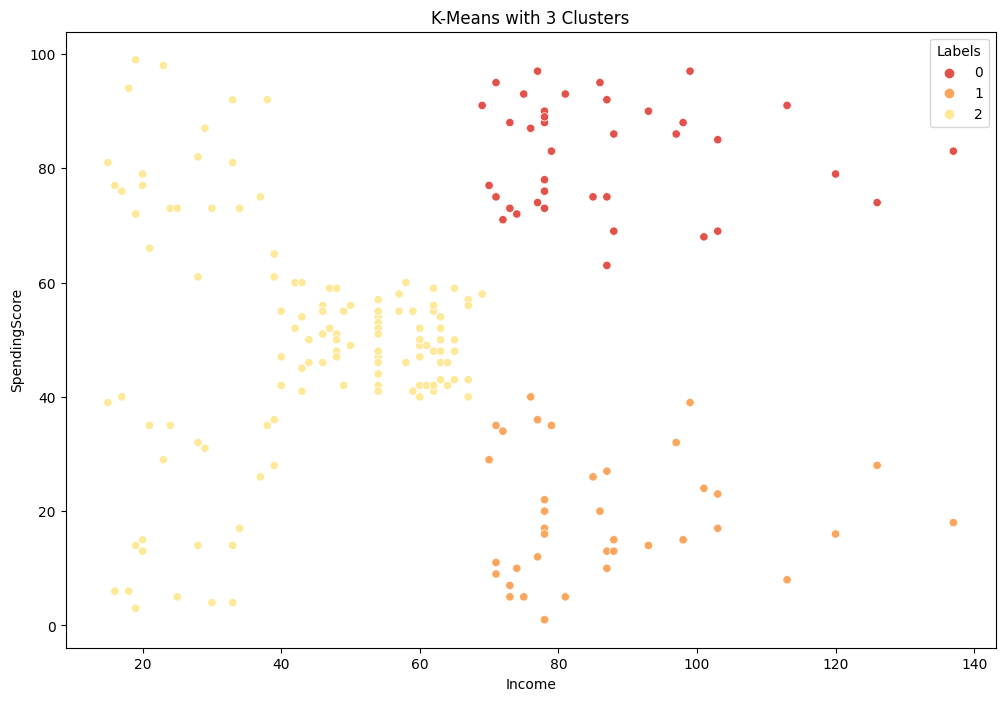

In [27]:
km3 = KMeans(n_clusters = 3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('K-Means with 3 Clusters')
plt.show()

#### K-Means for 6 clusters

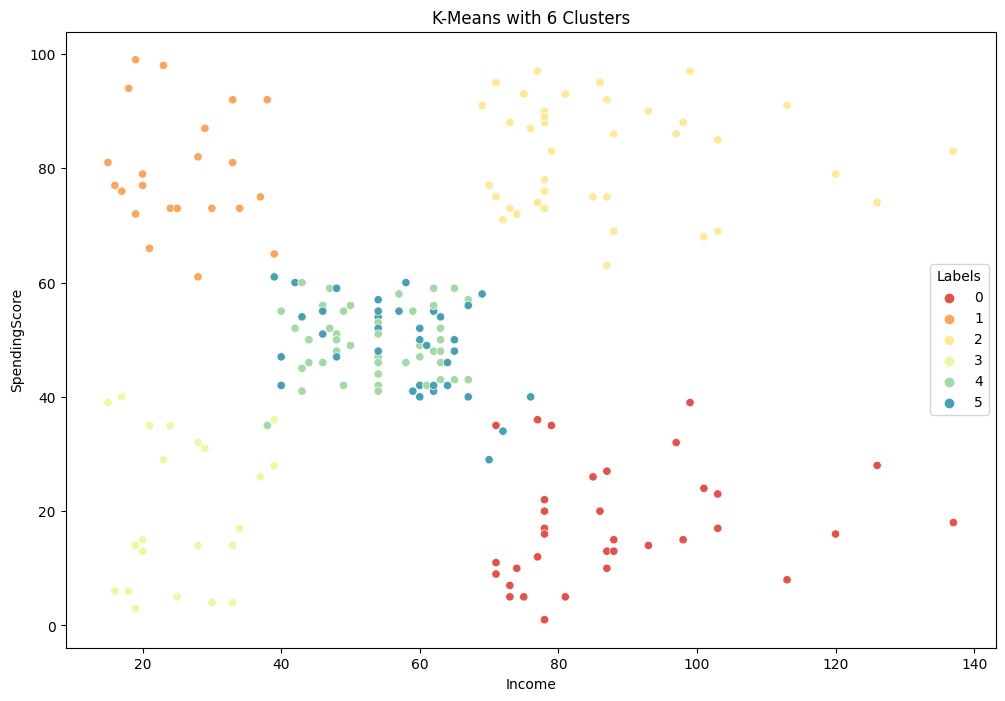

In [66]:
km6 = KMeans(n_clusters = 6).fit(X)
X['Labels'] = km6.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('K-Means with 6 Clusters')
plt.show()

#### K-Means for 5 clusters

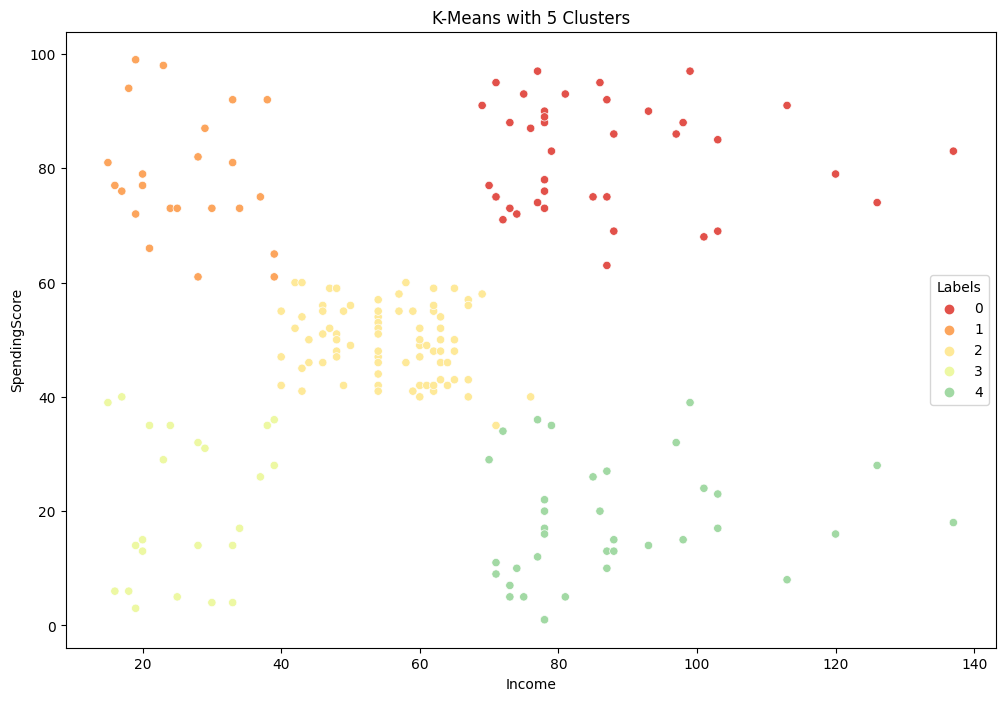

In [34]:
km5 = KMeans(n_clusters = 5).fit(X)
X['Labels'] = km5.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('K-Means with 5 Clusters')
plt.show()

**Завдання 11**

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

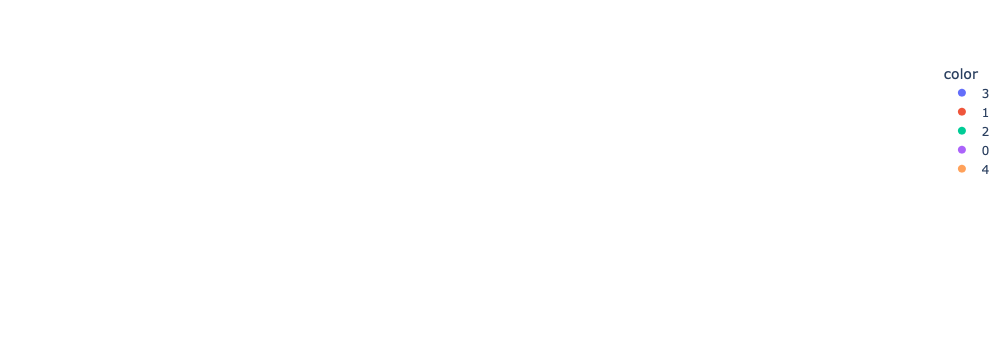

In [37]:
fig = px.scatter_3d(df, x='Income', y='SpendingScore', z='Age',
                    color=km5.labels_.astype(str))
fig.show()

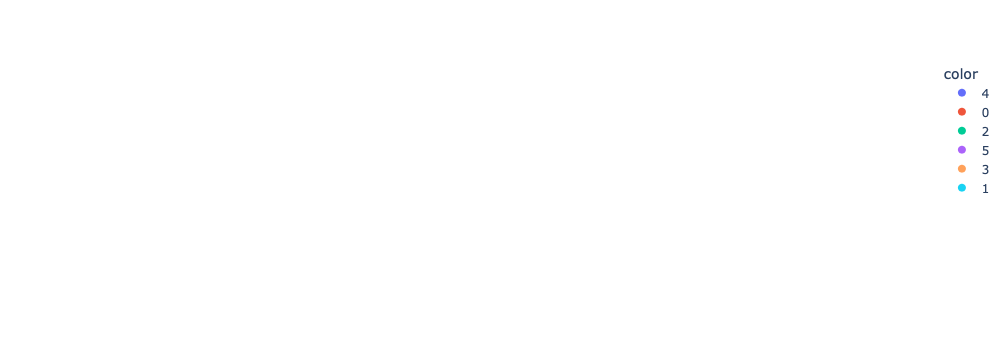

In [38]:
fig = px.scatter_3d(df, x='Income', y='SpendingScore', z='Age',
                    color=km6.labels_.astype(str))
fig.show()

**Висновки з завдання 10 - 11 (детальні)**

#### Висновок: 

Найбиільш оптимальною кількістю кластерів є 6 кластерів.
Можемо умовно розділити їх так:
1 кластер - високий дохід + великі витрати + вік (30-40 років) -> оранжевий

2 кластер - малий дохід +  великі витрати + вік(20-30 років) -> червоний

3 кластер - середній дохід+ середні витрати + вік (18-38 років) -> фіолетовий

4 кластер - середній дохід+ середні витрати + вік (40+) -> зелений

5 кластер - малий дохід +  великі витрати + вік (19-50 років) -> блакитний

6 кластер - малий дохід + малі витрати + вік(35-60 років) -> синій

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [44]:
dist = distance_matrix(X, X)
dist

array([[  0.        ,  42.09513036,  33.03028913, ..., 117.11532778,
        124.47891388, 130.16143822],
       [ 42.09513036,   0.        ,  75.03998934, ..., 111.76761606,
        137.77880824, 122.35195135],
       [ 33.03028913,  75.03998934,   0.        , ..., 129.8807145 ,
        122.18837915, 143.77412841],
       ...,
       [117.11532778, 111.76761606, 129.8807145 , ...,   0.        ,
         57.10516614,  14.35270009],
       [124.47891388, 137.77880824, 122.18837915, ...,  57.10516614,
          0.        ,  65.06150936],
       [130.16143822, 122.35195135, 143.77412841, ...,  14.35270009,
         65.06150936,   0.        ]])

#### Agglomerative clustering with linkage ='average'

**Завдання 12**

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


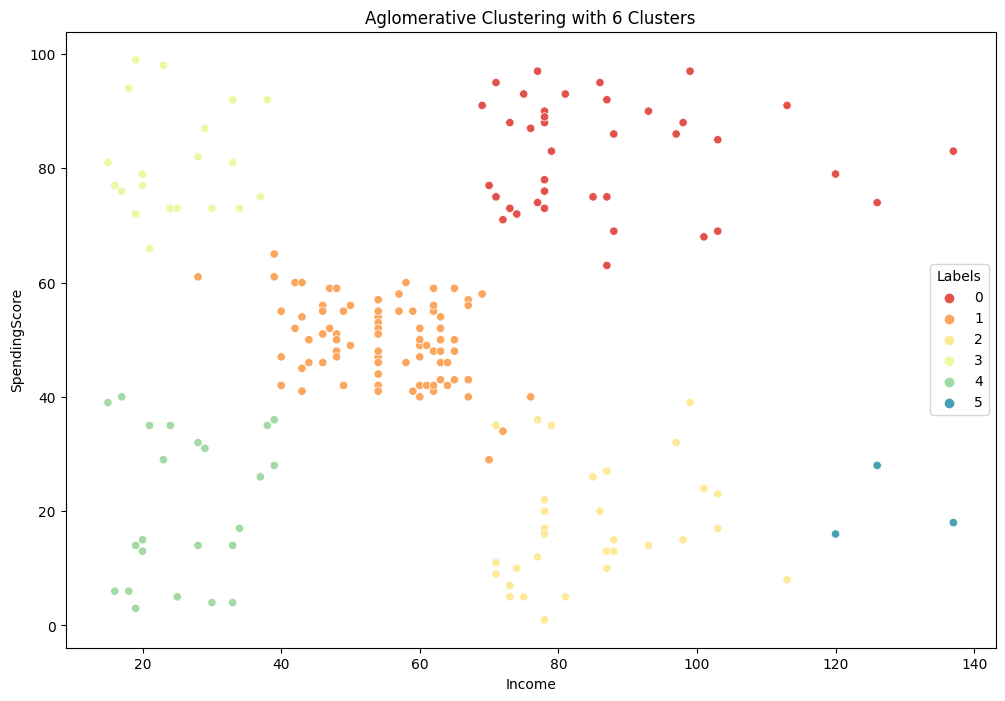

In [55]:
aglom = AgglomerativeClustering(n_clusters = 6, linkage ='average').fit(X)
X['Labels'] = aglom.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('Aglomerative Clustering with 6 Clusters')
plt.show()

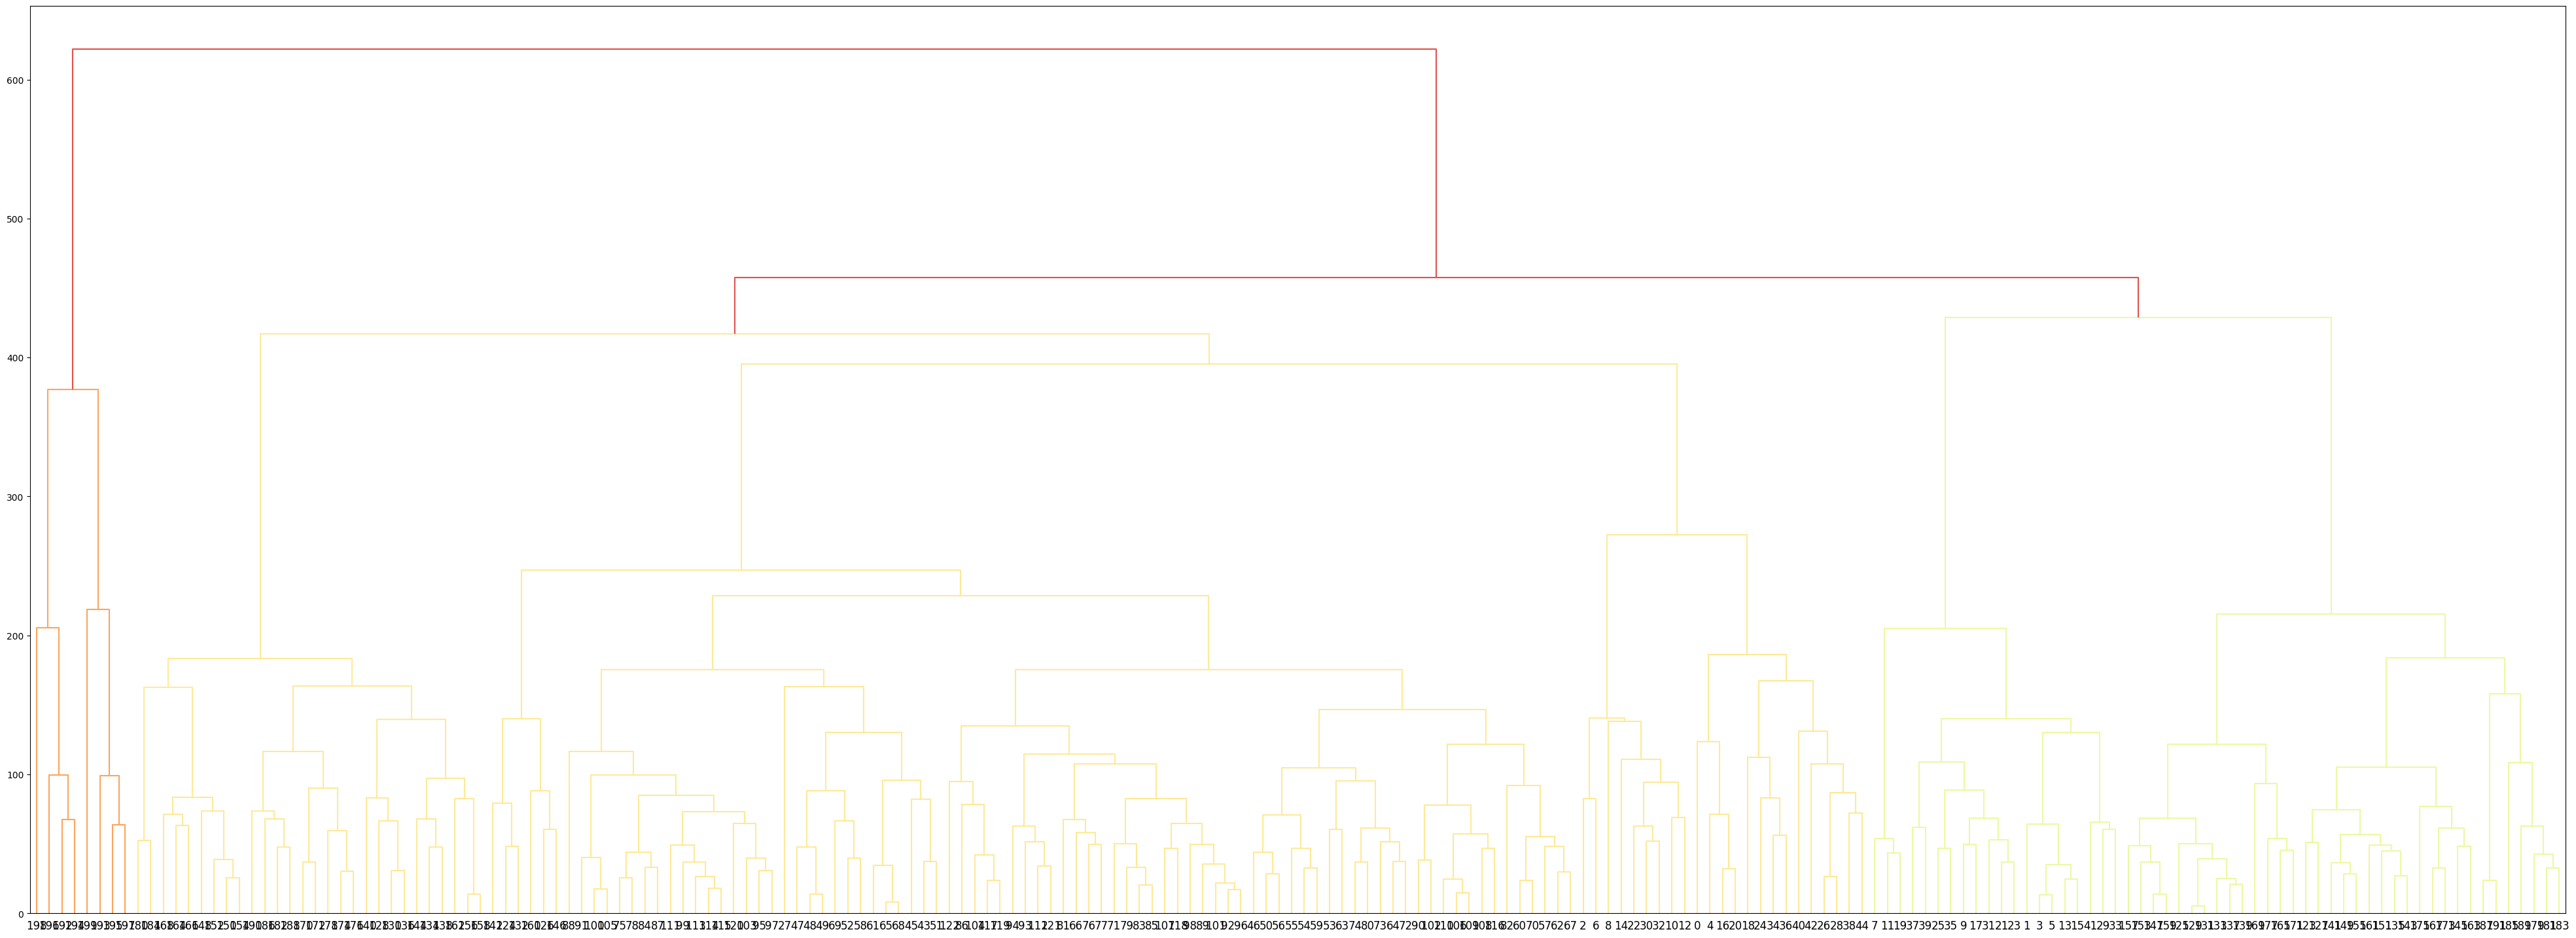

In [65]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(50,18))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size = 12)
plt.show()

#### Agglomerative clustering with linkage ='complete'

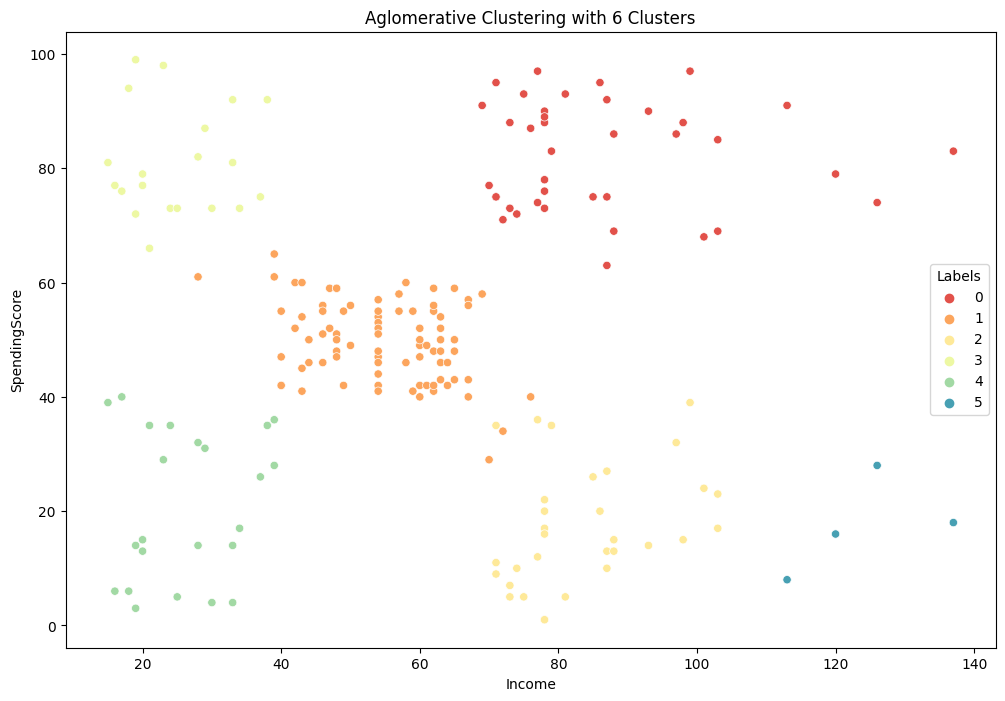

In [56]:
aglom = AgglomerativeClustering(n_clusters = 6, linkage ='complete').fit(X)
X['Labels'] = aglom.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('Aglomerative Clustering with 6 Clusters')
plt.show()

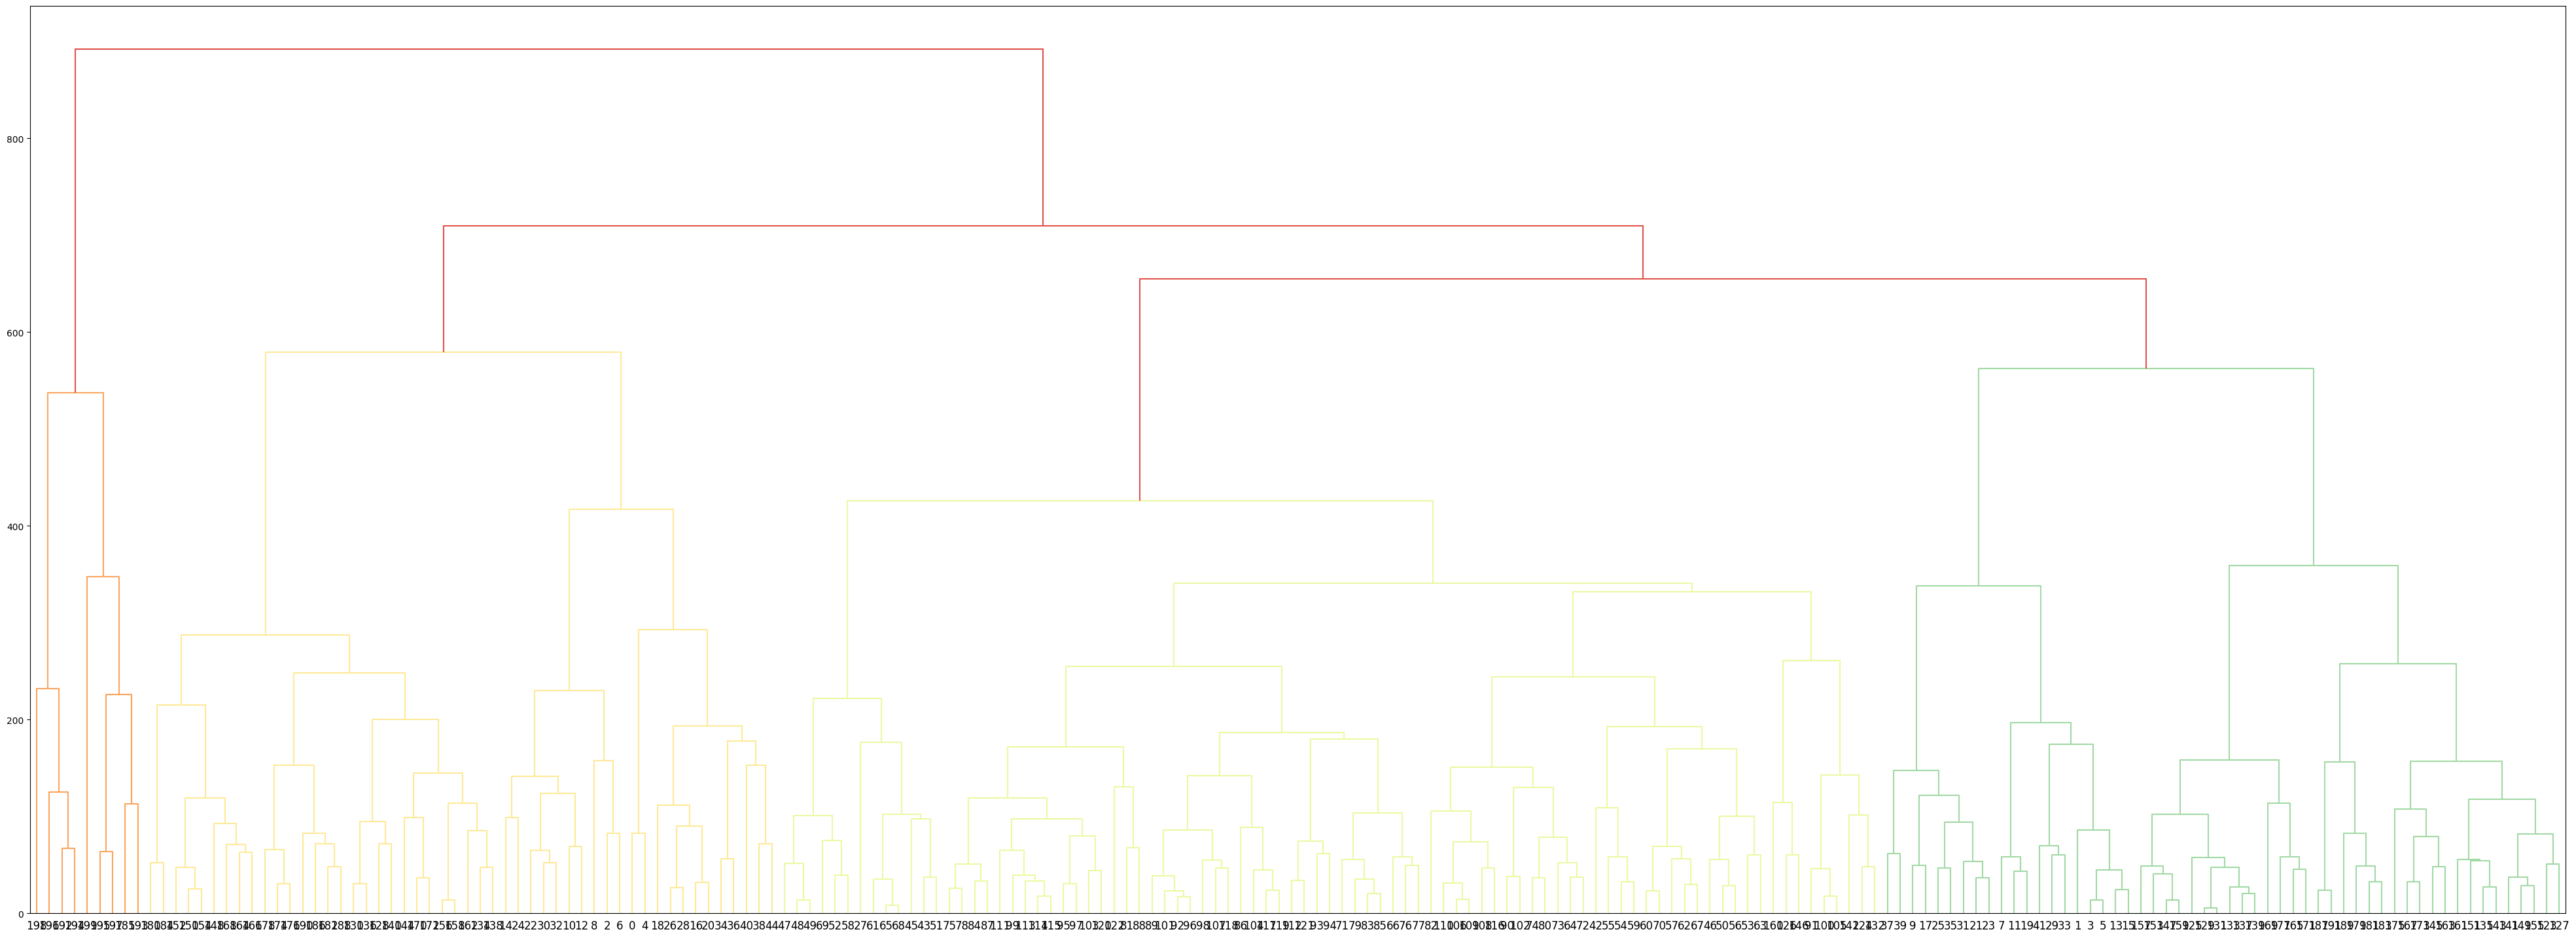

In [64]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(50,18))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size = 12)
plt.show()

#### Agglomerative clustering with linkage ='single'

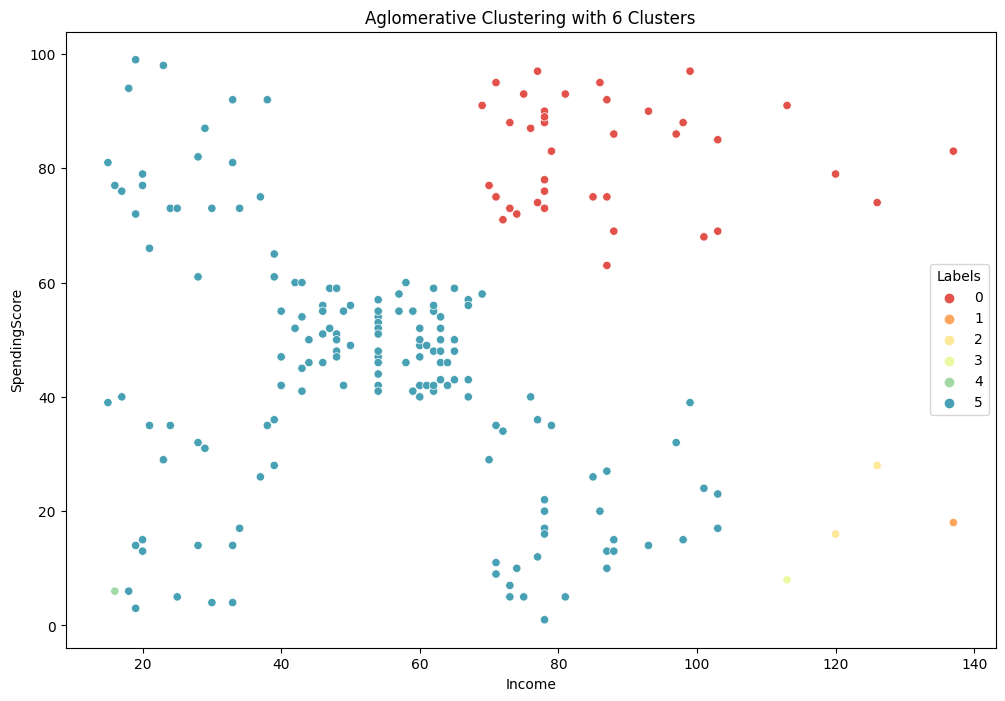

In [57]:
aglom = AgglomerativeClustering(n_clusters = 6, linkage ='single').fit(X)
X['Labels'] = aglom.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('Aglomerative Clustering with 6 Clusters')
plt.show()

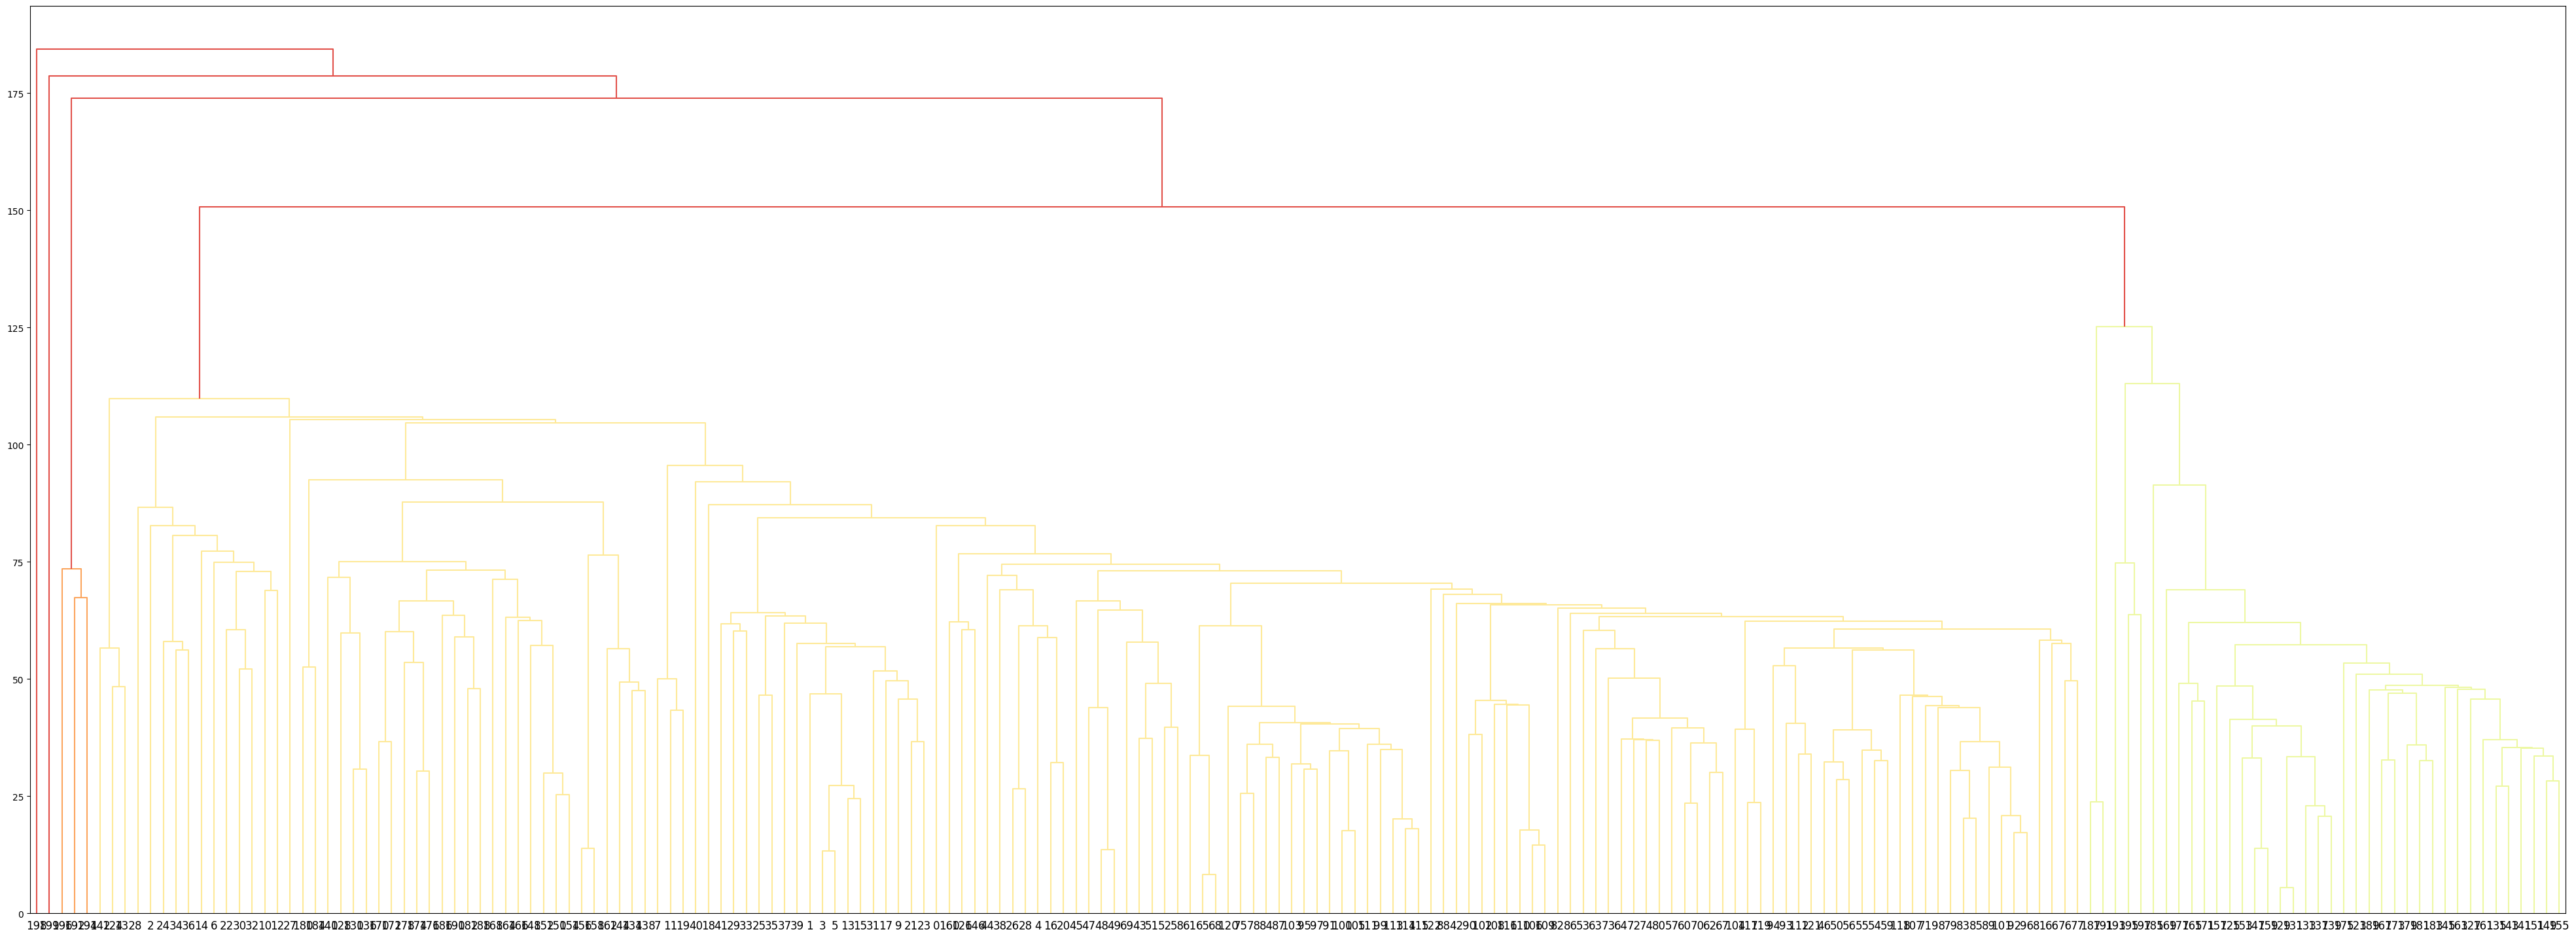

In [63]:
Z = hierarchy.linkage(dist, 'single')
plt.figure(figsize=(50,18))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size = 12)
plt.show()

#### Agglomerative clustering with linkage ='ward'

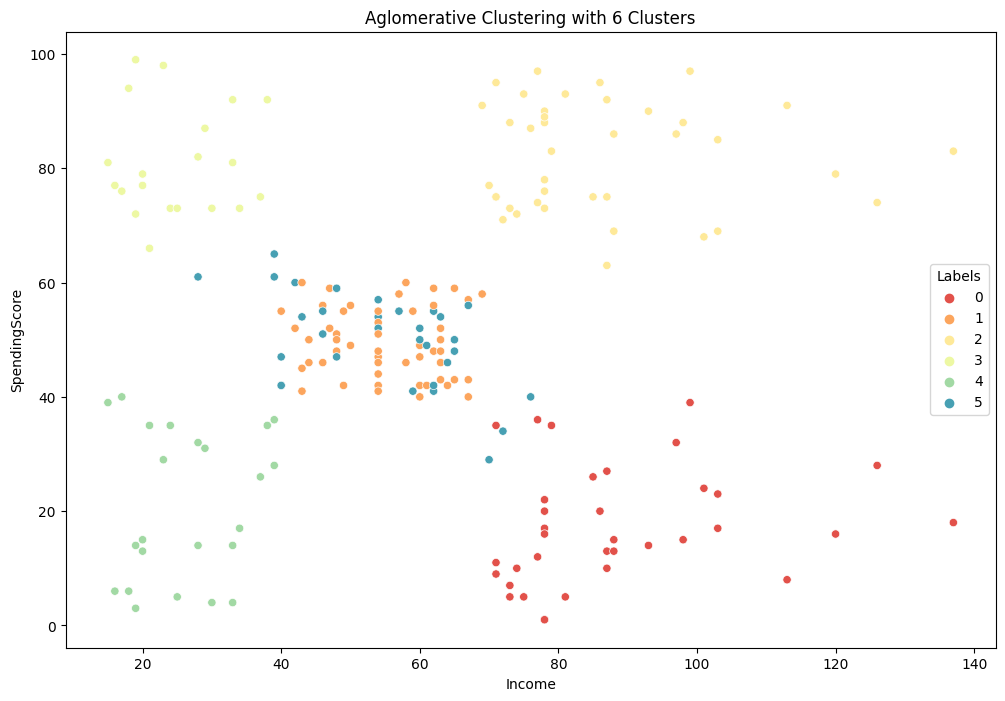

In [58]:
aglom = AgglomerativeClustering(n_clusters = 6, linkage ='ward').fit(X)
X['Labels'] = aglom.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('Aglomerative Clustering with 6 Clusters')
plt.show()

In [60]:
Z = hierarchy.linkage(dist, 'ward')

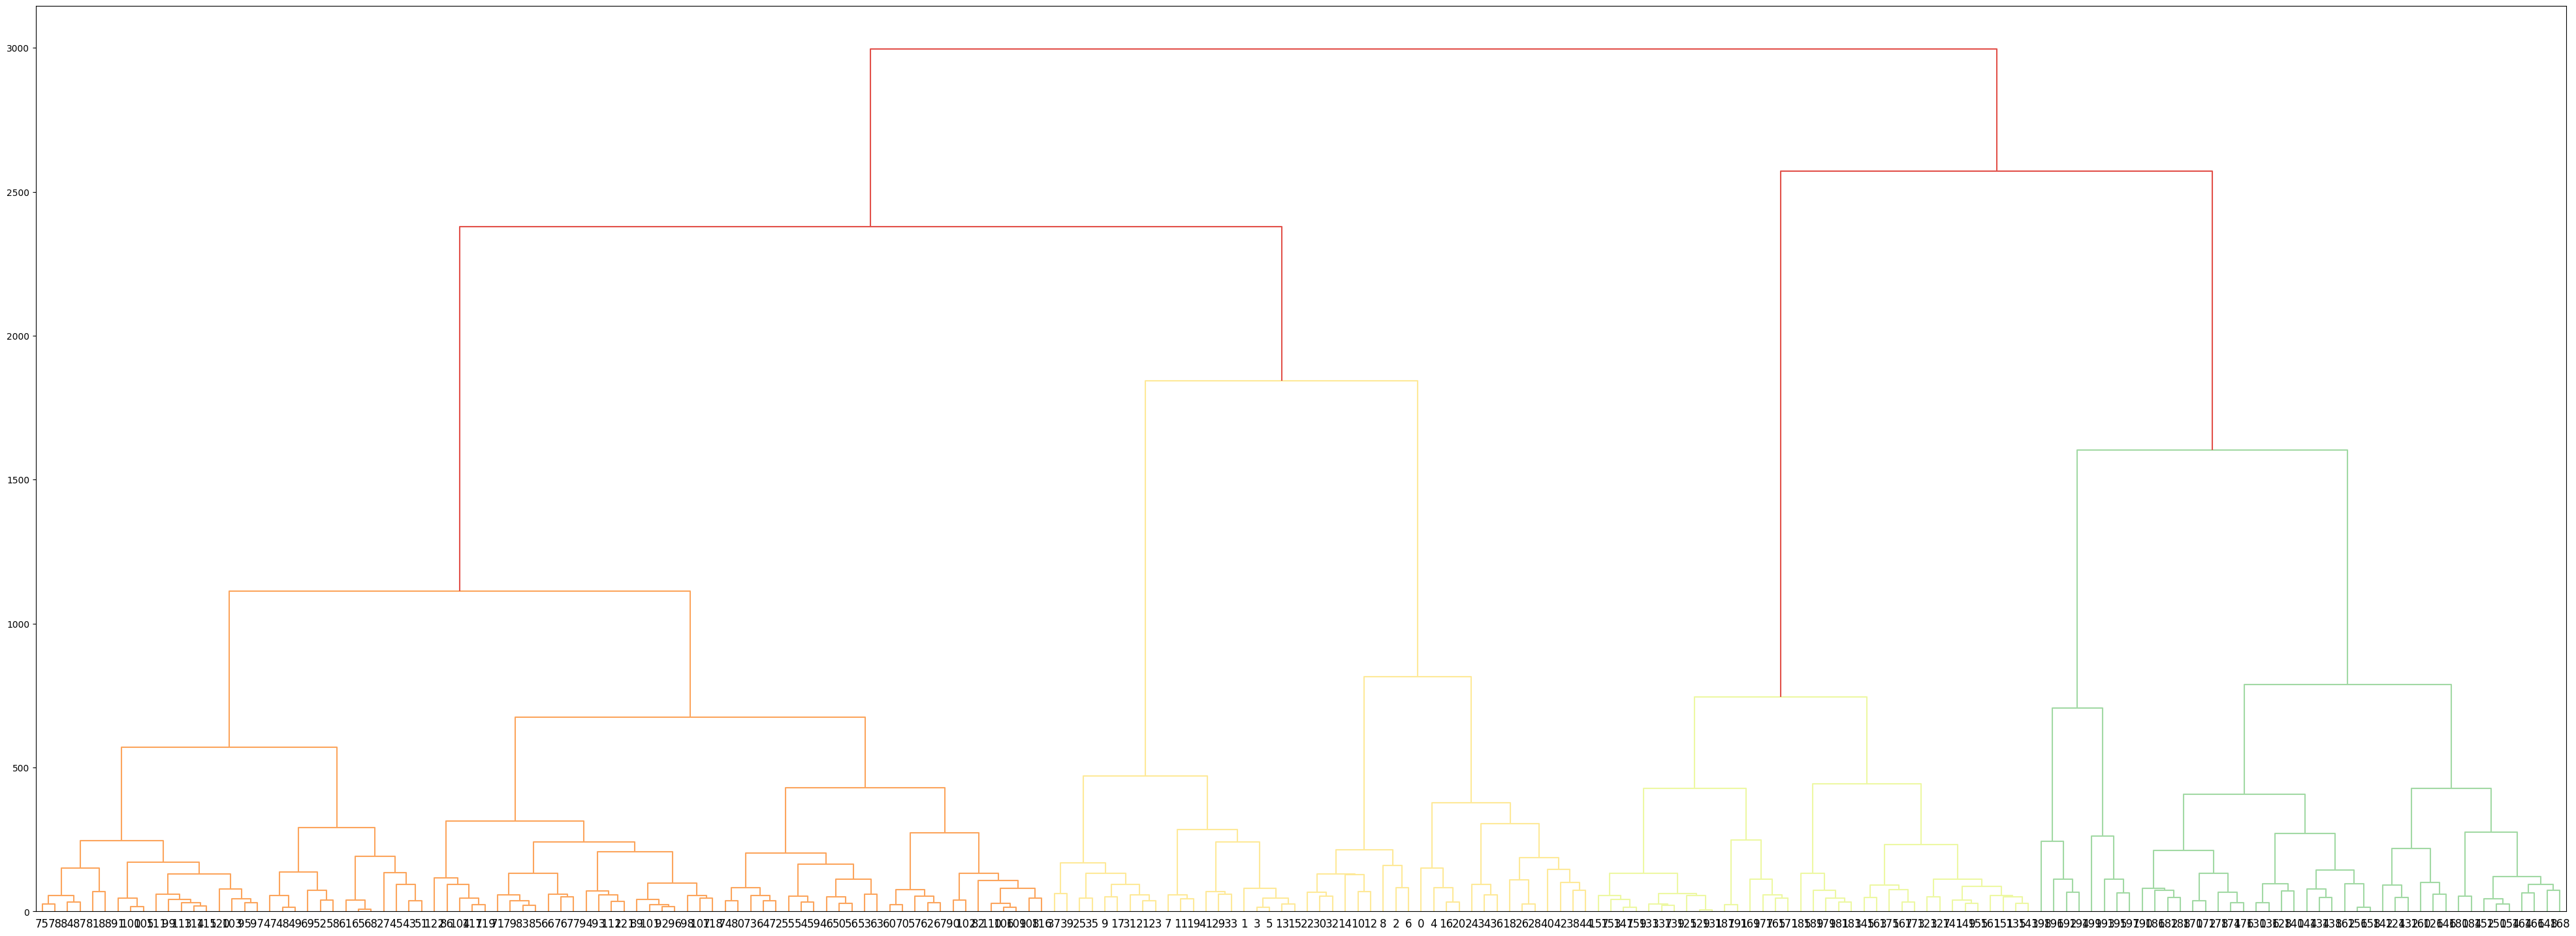

In [62]:
plt.figure(figsize=(50,18))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size = 12)
plt.show()

**Завдання 13**

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

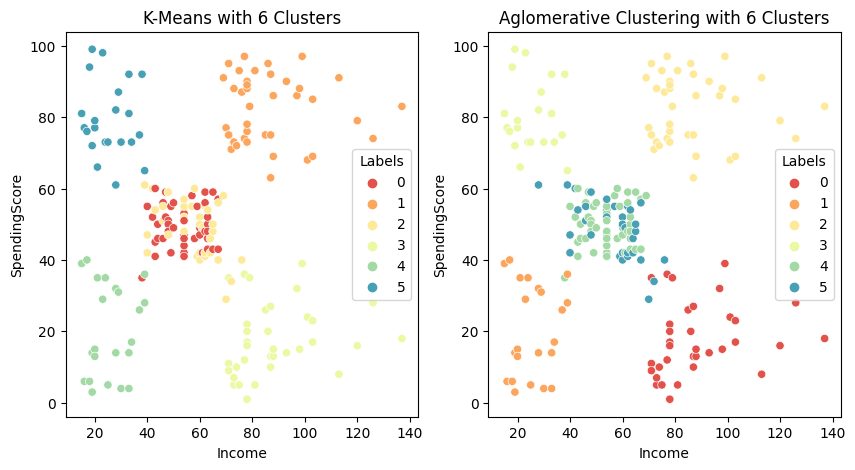

In [74]:
fig = plt.figure(figsize = (10,5))

ax1 = plt.subplot2grid((1,2),(0,0))
km6 = KMeans(n_clusters = 6).fit(X)
X['Labels'] = km6.labels_
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('K-Means with 6 Clusters')

ax2 = plt.subplot2grid((1,2),(0,1))
aglom = AgglomerativeClustering(n_clusters = 6, linkage ='ward').fit(X)
X['Labels'] = aglom.labels_
sns.scatterplot(x= X['Income'],y= X['SpendingScore'], hue = X['Labels'], palette = sns.color_palette("Spectral"))
plt.title('Aglomerative Clustering with 6 Clusters')

plt.show()

**Висновки з завдання 13 (детальні)**

Розглянули порівняння методів кластеризації на однаковій к-ті кластерів (6 шт)
Отже, обидва способи достатньо ефективно справляються з задачею кластеризації на цих даних